In [8]:
%matplotlib inline

# Histogram Matching
Original Code for the following can be found at [scikit-image.org](https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_histogram_matching.html). The following is an adaptation of the original scikit-image code for implementation in a neural-style-transfer process to return some of the original coloration from the input image from the stylized output-image the model generates. A [util function from the pytorch-example repo](https://github.com/ajgallard/examples/blob/master/fast_neural_style/neural_style/utils.py) is also used within the following code.

In [9]:
import matplotlib.pyplot as plt

from skimage import data
from skimage import exposure
from skimage.exposure import match_histograms

from PIL import Image
import numpy as np

In [10]:
def load_image(filename, size=None, scale=None):
    img = Image.open(filename).convert('RGB')
    if size is not None:
        img = img.resize((size, size), Image.ANTIALIAS)
    elif scale is not None:
        img = img.resize((int(img.size[0] / scale), int(img.size[1] / scale)), Image.ANTIALIAS)
    return img

In [11]:
ref_path = r'C:\Users\ajgal\Documents\GitHub\neural-style-transfer\images\content\kremlin.jpg'
source_path = r'C:\Users\ajgal\Documents\GitHub\neural-style-transfer\results\output_images\alphonse-mucha\alphonse-mucha_kremlin.jpg'

reference = np.array(load_image(ref_path))
source = np.array(load_image(source_path))

In [12]:
print(source.shape)
print(reference.shape)

(768, 1024, 3)
(768, 1024, 3)


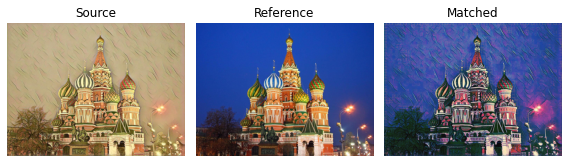

In [13]:
matched = match_histograms(source, reference, multichannel=True)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(source)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

To illustrate the effect of the histogram matching, we plot for each
RGB channel, the histogram and the cumulative histogram. Clearly,
the matched image has the same cumulative histogram as the reference
image for each channel.



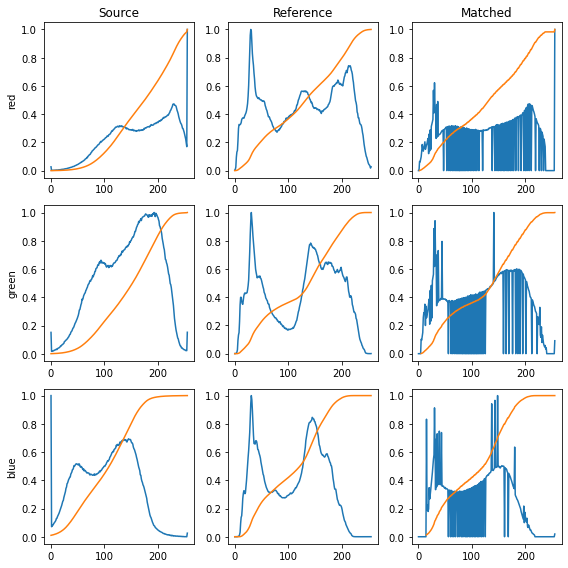

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))


for i, img in enumerate((source, reference, matched)):
    for c, c_color in enumerate(('red', 'green', 'blue')):
        img_hist, bins = exposure.histogram(img[..., c], source_range='dtype')
        axes[c, i].plot(bins, img_hist / img_hist.max())
        img_cdf, bins = exposure.cumulative_distribution(img[..., c])
        axes[c, i].plot(bins, img_cdf)
        axes[c, 0].set_ylabel(c_color)

axes[0, 0].set_title('Source')
axes[0, 1].set_title('Reference')
axes[0, 2].set_title('Matched')

plt.tight_layout()
plt.show()